In [41]:
#Para mostrar a imagem do BNDES:
from IPython.display import Image
from IPython.core.display import HTML

#Formatar casas decimais no Matplotlib:
from matplotlib.ticker import FormatStrFormatter 

Image(url= "https://www.cartaobndes.gov.br/cartaobndes/Images/header_BNDES-01.png", width = 500, height = 500)

# Importação de bibliotecas
A importação das bibliotecas utilizadas na análise de dados.

In [3]:
#Para operações com dataframes:
import pandas as pd

#Para visualizações:
import matplotlib.pyplot as plt
import seaborn as sns

#Setando o tamanho das figuras:
sns.set(rc={'figure.figsize':(11, 4)})

#Importando a biblioteca para acessar APIs (utilizada na API de Oxford para informações sobre COVID):
import requests

# Importação dos dados
Importação do dataset.

In [4]:
df = pd.read_csv('C:/Users/pfaprado/Documents/GitHub/bndes/operacoes-financiamento-operacoes-indiretas-automaticas.csv', sep=';')

# Exploração dos dados

## Dataset: Financiamento de operações indiretas automáticas
Foram exploradas as características dos financiamentos de operações indiretas automáticas presentes no dataset fornecido pelo BNDES.

### Exploração básica

Operações indiretas automáticas a MPMEs: concessão de crédito e pedidos de financiamentos via operações indiretas (através de agentes financeiros credenciados) automáticas. O agente financeiro avalia as necessidades do cliente e o tipo de crédito, apresentando a proposta junto ao BNDES. Pleito é analisado de forma automática com aderência aos requisitos legais. BNDES não negocia as condições, quem faz isso é o agente financeiro - ele também assume o risco do não-pagamento da dívida (assume o risco de crédito da linha de financiamento). O agente ganha o spread (taxa do cliente) nesse processo todo. 99% das operações aprovadas são indiretas automáticas (quase 57 bi de reais em 1 ano e meio), sendo que 87% foram operações a Micro, Pequena, Médias Empresas (MPMEs com ROB até 300 milhões de reais). Dados disponíveis: estatísticas de desembolsos (série temporal). Dados desagregados de operações contratadas (ano/mes, data de contratação, cliente, UF, município, valor da operação, valor desembolsado, custo financeiro, taxa/spread, prazos de carência/amortização, linha de financiamento, etc.

In [84]:
df.head()

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,...,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao_da_operacao
0,BANCO COOPERATIVO SICOOB S.A.,**.*38.232/0001-**,SP,PEDREGULHO,3537008,2002-01-02,16000,"16000,0",RECURSOS LIVRES - TESOURO,TAXA FIXA,...,Agropecuária,A0119900,CULT PLANTAS LAVOURA TEMPORARIA NAO ESPECIFICA...,AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO COOPERATIVO SICOOB S.A.,02.038.232.0001-64,LIQUIDADA
1,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,TRES DE MAIO,4321808,2002-01-02,8047,"8047,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
2,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,8104,"8104,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
3,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,6304,"6304,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
4,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,HUMAITA,4309704,2002-01-02,15000,"15000,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA


### Formatando as datas

In [6]:
df.columns

Index(['cliente', 'cpf_cnpj', 'uf', 'municipio', 'municipio_codigo',
       'data_da_contratacao', 'valor_da_operacao_em_reais',
       'valor_desembolsado_reais', 'fonte_de_recurso_desembolsos',
       'custo_financeiro', 'juros', 'prazo_carencia_meses',
       'prazo_amortizacao_meses', 'modalidade_de_apoio', 'forma_de_apoio',
       'produto', 'instrumento_financeiro', 'inovacao', 'area_operacional',
       'setor_cnae', 'subsetor_cnae_agrupado', 'subsetor_cnae_codigo',
       'subsetor_cnae_nome', 'setor_bndes', 'subsetor_bndes',
       'porte_do_cliente', 'natureza_do_cliente',
       'instituicao_financeira_credenciada', 'cnpj_do_agente_financeiro',
       'situacao_da_operacao'],
      dtype='object')

Transformando a coluna de data em datetime.

In [7]:
df['data_da_contratacao'] = pd.to_datetime(df['data_da_contratacao'])

Criando um novo dataframe, porém agora com as datas como index:

In [8]:
df_date_as_index = df.set_index('data_da_contratacao')
df_date_as_index.head(3)

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,...,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao_da_operacao
data_da_contratacao,,,,,,,,,,,,,,,,,,,,,
2002-01-02,BANCO COOPERATIVO SICOOB S.A.,**.*38.232/0001-**,SP,PEDREGULHO,3537008,16000,"16000,0",RECURSOS LIVRES - TESOURO,TAXA FIXA,"8,75",...,Agropecuária,A0119900,CULT PLANTAS LAVOURA TEMPORARIA NAO ESPECIFICA...,AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO COOPERATIVO SICOOB S.A.,02.038.232.0001-64,LIQUIDADA
2002-01-02,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,TRES DE MAIO,4321808,8047,"8047,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
2002-01-02,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,8104,"8104,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",...,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA


Poderíamos ter condensado tudo em uma única linha: importação e setando datas como index:

- df_date_as_index = pd.read_csv('C:/Users/pfaprado/Documents/GitHub/bndes/operacoes-financiamento-operacoes-indiretas-automaticas.csv', index_col=0, parse_dates=True)

Vamos criar agora novas colunas, utilizando as propriedades de DatetimeIndex do index temporal:

In [9]:
df_date_as_index.index

DatetimeIndex(['2002-01-02', '2002-01-02', '2002-01-02', '2002-01-02',
               '2002-01-02', '2002-01-02', '2002-01-02', '2002-01-02',
               '2002-01-02', '2002-01-02',
               ...
               '2021-05-31', '2021-05-31', '2021-05-31', '2021-05-31',
               '2021-05-31', '2021-05-31', '2021-05-31', '2021-05-31',
               '2021-05-31', '2021-05-31'],
              dtype='datetime64[ns]', name='data_da_contratacao', length=2083363, freq=None)

In [10]:
df_date_as_index['ano'] = df_date_as_index.index.year
df_date_as_index['mes'] = df_date_as_index.index.month
df_date_as_index['dia'] = df_date_as_index.index.day
df_date_as_index['dia_nome'] = df_date_as_index.index.dayofweek

Tirando uma amostra aleatória do dataframe:

In [11]:
df_date_as_index.sample(5, random_state=0)

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,...,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao_da_operacao,ano,mes,dia,dia_nome
data_da_contratacao,,,,,,,,,,,,,,,,,,,,,
2012-06-22,AUTO POSTO TRADICAO LTDA,**.*15.352/0001-**,MG,MURIAE,3143906,61338,"61338,0",RECURSOS LIVRES - TESOURO,TAXA FIXA,"5,5",...,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,ITAU UNIBANCO S.A.,60.701.190.0001-04,LIQUIDADA,2012,6,22,4
2006-11-29,BANCO BRADESCO S.A.,**.*46.948/0001-**,GO,MARA ROSA,5212808,153000,"153000,0",RECURSOS LIVRES - TESOURO,TAXA FIXA,"8,75",...,AGROPECUÁRIA,MICRO,PRIVADA,BANCO BRADESCO S.A.,60.746.948.0001-12,LIQUIDADA,2006,11,29,2
2004-06-29,BANCO DO BRASIL SA,**.*00.000/0001-**,SC,POUSO REDONDO,4213708,220,"220,0",RECURSOS LIVRES - TESOURO,TAXA FIXA,"8,75",...,AGROPECUÁRIA,MICRO,PRIVADA,BANCO DO BRASIL SA,00.000.000.0001-91,LIQUIDADA,2004,6,29,1
2011-07-05,RONILDO FRIZZO ME,**.*85.523/0001-**,RS,PLANALTO,4314704,620000,"620000,0",RECURSOS LIVRES - TESOURO,TJ462,"8,5",...,ALIMENTO E BEBIDA,PEQUENA,PRIVADA,CAIXA ECONOMICA FEDERAL,00.360.305.0001-04,LIQUIDADA,2011,7,5,1
2003-06-12,CAFE BOM JESUS INDUSTRIA COMERCIO E AGROPECUAR...,**.*29.058/0001-**,RS,CAXIAS DO SUL,4305108,38400,"38400,0",RECURSOS LIVRES - PRÓPRIOS,TJLP,"6,0",...,ALIMENTO E BEBIDA,MÉDIA,PRIVADA,BANCO SAFRA S A,58.160.789.0001-28,LIQUIDADA,2003,6,12,3


### Time series de operações

Agrupando por ano através de soma dos valores da operação em reais:

In [12]:
df_date_as_index.groupby(by='ano').aggregate(np.sum).loc[:,'valor_da_operacao_em_reais']

ano
2002     6802296993
2003     8920773959
2004    10603227830
2005    13837237795
2006    14820484386
2007    24370683170
2008    29047780879
2009    39451829609
2010    61515299049
2011    51523181330
2012    63917154352
2013    69995748682
2014    60929130817
2015    23258542666
2016    17052468229
2017    21933268641
2018    17414814443
2019    11195649964
2020    16892284014
2021     5935994190
Name: valor_da_operacao_em_reais, dtype: int64

([<matplotlib.axis.XTick at 0x1a536be4e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

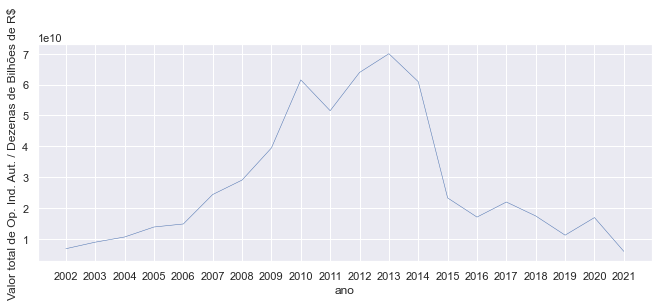

In [73]:
#Graficando em um time series:
df_date_as_index.groupby(by='ano').aggregate(np.sum).loc[:,'valor_da_operacao_em_reais'].plot(linewidth=0.5);
plt.ylabel("Valor total de Op. Ind. Aut. / Dezenas de Bilhões de R$")
plt.xticks(np.arange(min(pd.DataFrame(df_date_as_index.groupby(by='ano').aggregate(np.sum).loc[:,'valor_da_operacao_em_reais']).index), max(pd.DataFrame(df_date_as_index.groupby(by='ano').aggregate(np.sum).loc[:,'valor_da_operacao_em_reais']).index)+1, 1.0))

In [14]:
#Analisando o pico de investimentos ao longo dos anos:
print(f"""
      O pico dos investimentos foi de aproximadamente
      {(df_date_as_index.groupby(by='ano').aggregate(np.sum).loc[:,'valor_da_operacao_em_reais'].max()/1000000000):.0f}
      bilhões de reais
      em 2013.
      """)


      O pico dos investimentos foi de aproximadamente
      70
      bilhões de reais
      em 2013.
      


### Tendência e sazonalidade

#### Geral

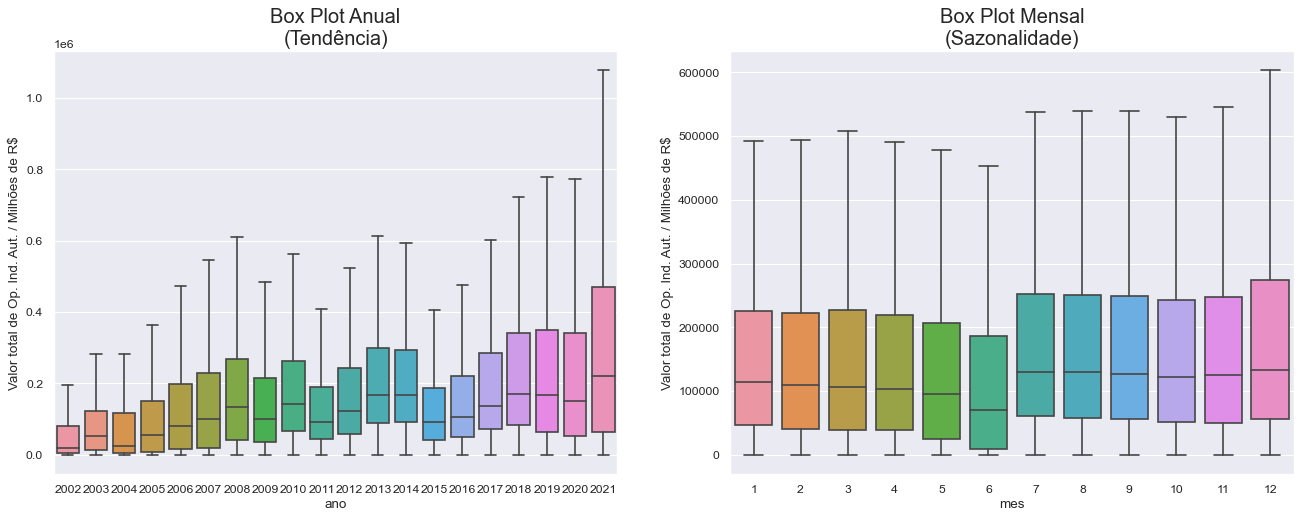

In [75]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='ano', y='valor_da_operacao_em_reais', data=df_date_as_index, ax=axes[0], showfliers = False)
sns.boxplot(x='mes', y='valor_da_operacao_em_reais', data=df_date_as_index, showfliers = False)

# Set Title
axes[0].set_title('Box Plot Anual\n(Tendência)', fontsize=18); 
axes[1].set_title('Box Plot Mensal\n(Sazonalidade)', fontsize=18)
axes[0].set_ylabel('Valor total de Op. Ind. Aut. / Milhões de R$')
axes[1].set_ylabel('Valor total de Op. Ind. Aut. / Milhões de R$')
plt.show()

No 1o gráfico, observada tendência de aumento dos investimentos conforme o avanço dos mandatos de governo. 2007 a 2010. 2011 a 2014. 2015-2018. De 2002 a 2007 houve um período de expansão dos investimentos. Observa-se desse gráfico grande variabilidade em 2021, o que pode ser explicado pela baixa quantidade de investimentos registrada até o momento.

Observando a composição desses investimentos em total de reais:

In [16]:
df.columns

Index(['cliente', 'cpf_cnpj', 'uf', 'municipio', 'municipio_codigo',
       'data_da_contratacao', 'valor_da_operacao_em_reais',
       'valor_desembolsado_reais', 'fonte_de_recurso_desembolsos',
       'custo_financeiro', 'juros', 'prazo_carencia_meses',
       'prazo_amortizacao_meses', 'modalidade_de_apoio', 'forma_de_apoio',
       'produto', 'instrumento_financeiro', 'inovacao', 'area_operacional',
       'setor_cnae', 'subsetor_cnae_agrupado', 'subsetor_cnae_codigo',
       'subsetor_cnae_nome', 'setor_bndes', 'subsetor_bndes',
       'porte_do_cliente', 'natureza_do_cliente',
       'instituicao_financeira_credenciada', 'cnpj_do_agente_financeiro',
       'situacao_da_operacao'],
      dtype='object')

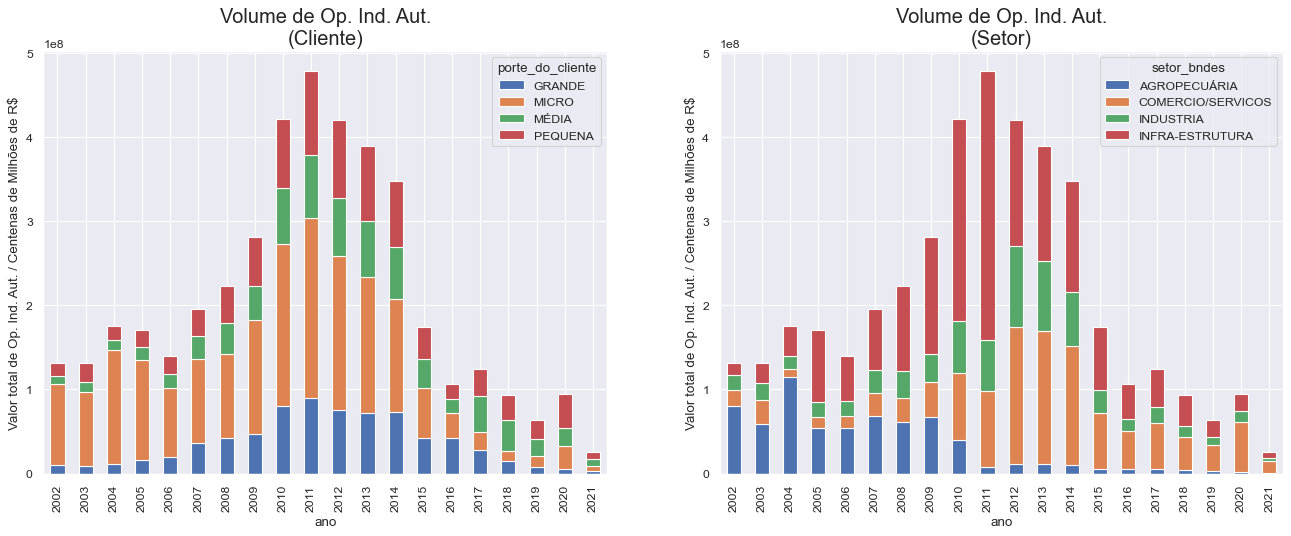

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)

investimentos_anuais_stacked = df_date_as_index.groupby(['ano','porte_do_cliente'])['ano'].sum().unstack('porte_do_cliente')
investimentos_anuais_stacked.plot(kind='bar', stacked=True, ax=axes[0])
investimentos_anuais_stacked = df_date_as_index.groupby(['ano','setor_bndes'])['ano'].sum().unstack('setor_bndes')
investimentos_anuais_stacked.plot(kind='bar', stacked=True, ax=axes[1])

# Set Title
axes[0].set_title('Volume de Op. Ind. Aut.\n(Cliente)', fontsize=18); 
axes[1].set_title('Volume de Op. Ind. Aut.\n(Setor)', fontsize=18)
axes[0].set_ylabel('Valor total de Op. Ind. Aut. / Centenas de Milhões de R$')
axes[1].set_ylabel('Valor total de Op. Ind. Aut. / Centenas de Milhões de R$')
plt.show()

Por porte de cliente, de 2002 a 2014 as micro empresas sempre foram o alvo em volume de investimentos, com crescimento das pequenas e médias. A partir de 2015 o volume diminuiu consideravelmente para as pequenas/médias/micro empresas, e passou a ser mais uniforme entre os portes.

Agropecuária desaparece quase, infraestrutura aumenta por um tempo porém diminui novamente. Comércio cresce e se mantém líder dos investimentos.


#### Porte do cliente

In [18]:
#Criando um crosstab para plotar um stacked bar percentual.
cross_ano_porte = pd.crosstab(df_date_as_index['ano'], df_date_as_index['porte_do_cliente'], values=df_date_as_index.valor_da_operacao_em_reais, aggfunc='sum', margins=False, normalize='index')
cross_ano_porte.columns = ['MICRO', 'PEQUENA', 'MÉDIA', 'GRANDE']

In [19]:
#Copiando os indexes para criar uma coluna com os anos:
cross_ano_porte['ano'] = cross_ano_porte.index

Text(0, 0.5, 'Share')

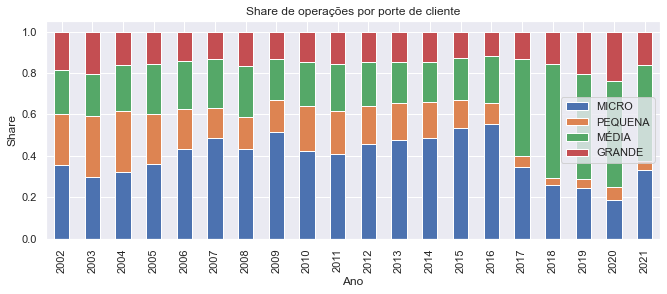

In [78]:
cross_ano_porte.plot(
    x = 'ano',
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

plt.title('Share de operações por porte de cliente')
plt.xlabel('Ano')
plt.ylabel('Share')

Ao longo dos anos, as de porte MÉDIO tiveram maior participação em volume de investimentos. As empresas de porte PEQUENA tiveram menor participação a partir de 2017.

#### Setor do BNDES

In [21]:
#Criando um crosstab para plotar um stacked bar percentual.
cross_ano_setor = pd.crosstab(df_date_as_index['ano'], df_date_as_index['setor_bndes'], values=df_date_as_index.valor_da_operacao_em_reais, aggfunc='sum', margins=False, normalize='index')

In [22]:
#Copiando os indexes para criar uma coluna com os anos:
cross_ano_setor['ano'] = cross_ano_setor.index

Text(0, 0.5, 'Share')

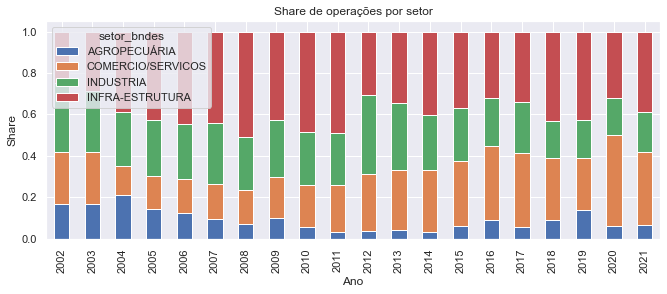

In [79]:
#Plotar o stacked bar percentualmente.
cross_ano_setor.plot(
    x = 'ano',
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

plt.title('Share de operações por setor')
plt.xlabel('Ano')
plt.ylabel('Share')

Percentualmente, a participação de INDUSTRIA e AGROPECUÁRIA diminuíram. COMERCIO/SERVIÇOS aumentou.

## Dataset: Stringency por COVID (Oxford)
Foi explorado ainda a relação entre o aumento das restrições geradas pelo COVID e o volume de operações indiretas automáticas contratadas.

### Tratamento dos dados

API Covidtracker de Oxford (Fonte: https://covidtracker.bsg.ox.ac.uk/) foi utilizada para construir um time series do nível de stringency do Brasil desde o início da pandêmia. O Stringency Index é calculado com base em 7 indicadores de políticas públicas:
- "School closing"
- "Workplace closing"
- "Cancel public events"
- "Restrictions on gathering size"
- "Close public transport"
- "Stay at home requirements"
- "Restrictions on internal movement"
- "Restrictions on international travel"
- "Public information campaign".

In [82]:
#Relizando a request:
response = requests.get('https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/2020-01-02/2021-08-14')

In [83]:
#Checando a resposta da API; Response 200: A API está retornando resposta.
response

<Response [200]>

In [26]:
#O dicionário/json retornado para o período escolhido:
results = response.json()

In [27]:
#Extraindo o dia de hoje:
import datetime
today = pd.to_datetime("today")
hoje = today.date()
hoje

datetime.date(2021, 8, 30)

In [28]:
#Função para criar lista de dias desde 01-01-2020:
dia_teste = hoje
lista_dias_total = []
dia_corte = pd.to_datetime('2020-01-01').date()

while dia_teste > dia_corte:
    dia_teste = dia_teste-datetime.timedelta(days=1)
    lista_dias_total.append(dia_teste)

In [29]:
#Os dias ficam com o formato abaixo:
str(lista_dias_total[0])

'2021-08-29'

In [80]:
#Criação da lista com os dias que existem apontamentos para o Brasil:
brazil_lista = []
for dia in lista_dias:
    try:
        results['data'][str(dia)]['BRA']
        brazil_lista.append(str(dia))
        #print(f'Existe {dia}')
    except:
        #print(f'Não existe o dia {dia}')

IndentationError: expected an indented block (<ipython-input-80-5828efc07328>, line 9)

In [ ]:
#Criando um dataframe para armazenar o dia, nível de constringência e constringência legado:
df_dia_constringencia = pd.DataFrame({'dia':[], 'stringency':[], 'stringency_legacy':[]})

In [ ]:
#Apendando em três listas distintas para futuramenta inserir no dataframe:
lista_dia = []
lista_stringency = []
lista_stringency_legacy = []

for dia in brazil_lista:
    try:
        a = results['data'][str(dia)]['BRA']['stringency']
        b = results['data'][str(dia)]['BRA']['stringency_legacy']
                
        lista_dia.append(str(dia))
        lista_stringency.append(a)
        lista_stringency_legacy.append(b)
    except:
        continue

In [ ]:
#Inserindo o conteúdo das listas no dataframe:
df_dia_constringencia['dia'] = lista_dia
df_dia_constringencia['stringency'] = lista_stringency
df_dia_constringencia['stringency_legacy'] = lista_stringency_legacy

In [ ]:
#Checando o formato do dataframe:
df_dia_constringencia

In [ ]:
#Colocando as datas como index:
df_dia_constringencia['dia'] = pd.to_datetime(df_dia_constringencia['dia'])
df_dia_constringencia_index = df_dia_constringencia.set_index('dia')

#Observando ocmo ficou:
df_dia_constringencia_index.sample(5, random_state=0)

In [ ]:
#Verificando o tipo de dado que está no índice do dataframe de investimentos indiretos automáticos:
df_date_as_index.index

In [ ]:
#Verificando o tipo de dado que está no índice do dataframe de constringência:
df_dia_constringencia_index.index

In [ ]:
#Dando um merge através dos índices de data:
consolidado_investimentos_stringency = pd.merge(df_date_as_index, df_dia_constringencia_index, left_index=True, right_index=True, how='inner')

#Verificando a cara do dataframe:
consolidado_investimentos_stringency.sample(3, random_state=0)

A fim de poder construir também um dataframe com ano-mês agrupado, o que pode facilitar a análise e visão no time series multilinha:

In [ ]:
#Criamos uma coluna 'ano-mes', primeiramente igualando ao índice do dataframe:
consolidado_investimentos_stringency['ano-mes'] = consolidado_investimentos_stringency.index

In [ ]:
#Agora extraímos os 7 primeiros caracteres presentes nessa coluna nova e substituímos nela mesma:
consolidado_investimentos_stringency['ano-mes'] = consolidado_investimentos_stringency['ano-mes'].apply(lambda x: str(x)[0:7])
consolidado_investimentos_stringency['ano-mes']

In [ ]:
#O dataframe consolidado ano-mes fica conforme abaixo: 'consolidado_investimentos_stringency_ano_mes'
consolidado_investimentos_stringency_ano_mes = consolidado_investimentos_stringency.groupby('ano-mes').agg('mean')[['stringency','valor_da_operacao_em_reais']]
consolidado_investimentos_stringency_ano_mes

### Time series de volume de operações versus stringency

####  Stringency e valor total de operações - por dia

In [ ]:
#Construindo um time series multiline e com dois eixos:
ax = consolidado_investimentos_stringency.plot(y="stringency", legend=False)
ax2 = ax.twinx()
consolidado_investimentos_stringency.plot(y="valor_da_operacao_em_reais", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

#### Stringency e valor total de operações - agrupado por ano-mês

In [81]:
#Construindo um time series multiline e com dois eixos:
ax = consolidado_investimentos_stringency_ano_mes.plot(y="stringency", legend=False, color="r")
ax2 = ax.twinx()
consolidado_investimentos_stringency_ano_mes.plot(y="valor_da_operacao_em_reais", ax=ax2, legend=False, color="b")
ax.figure.legend()
plt.show()

NameError: name 'consolidado_investimentos_stringency_ano_mes' is not defined

Será necessário aprofundar-se através de um teste de Granger.